In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_weather = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/time_series_feature_extraction/4_Training_Weather_Data_2014_2021_tsfresh_extracted_features_filtered_2.csv', index_col=0)
train_trait = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/data/Training_Data/1_Training_Trait_Data_2014_2021.csv')
train_weather['Env'] = train_weather.index

In [37]:
# data = pd.read_csv('/Users/rkhu/Desktop/upenn/other/maize_gxe/analysis/merged_features.csv', encoding= 'unicode_escape')

In [38]:
data = train_trait[['Env','Hybrid','Yield_Mg_ha']].merge(train_weather, on='Env')
data = data.dropna(axis=0)

In [39]:
data

,Env,Hybrid,Yield_Mg_ha,T2M_MAX__ratio_beyond_r_sigma__r_1.5,T2M_MAX__ratio_beyond_r_sigma__r_0.5,T2M_MAX__energy_ratio_by_chunks__num_segments_10__segment_focus_8,ALLSKY_SFC_SW_DNI__ratio_beyond_r_sigma__r_2,T2M_MAX__ar_coefficient__coeff_0__k_10,ALLSKY_SFC_SW_DNI__c3__lag_1,"ALLSKY_SFC_PAR_TOT__cwt_coefficients__coeff_13__w_10__widths_(2, 5, 10, 20)",...,"PS__fft_coefficient__attr_""abs""__coeff_90","QV2M__fft_coefficient__attr_""abs""__coeff_30",T2M_MIN__index_mass_quantile__q_0.8,"WS2M__fft_coefficient__attr_""abs""__coeff_31","PRECTOTCORR__fft_coefficient__attr_""abs""__coeff_39","GWETROOT__agg_linear_trend__attr_""intercept""__chunk_len_10__f_agg_""var""",ALLSKY_SFC_SW_DNI__index_mass_quantile__q_0.6,"T2MWET__fft_coefficient__attr_""angle""__coeff_2","PS__change_quantiles__f_agg_""var""__isabs_True__qh_0.8__ql_0.6","PS__fft_coefficient__attr_""abs""__coeff_96"
0,DEH1_2014,M0088/LH185,5.721725,0.104110,0.736986,0.061235,0.010959,0.603104,5639.070752,50.279124,...,7.013648,55.795072,0.712329,5.587170,94.039923,0.000196,0.569863,96.919937,0.009815,17.992775
1,DEH1_2014,M0143/LH185,11.338246,0.104110,0.736986,0.061235,0.010959,0.603104,5639.070752,50.279124,...,7.013648,55.795072,0.712329,5.587170,94.039923,0.000196,0.569863,96.919937,0.009815,17.992775
2,DEH1_2014,M0003/LH185,6.540810,0.104110,0.736986,0.061235,0.010959,0.603104,5639.070752,50.279124,...,7.013648,55.795072,0.712329,5.587170,94.039923,0.000196,0.569863,96.919937,0.009815,17.992775
3,DEH1_2014,M0035/LH185,10.366857,0.104110,0.736986,0.061235,0.010959,0.603104,5639.070752,50.279124,...,7.013648,55.795072,0.712329,5.587170,94.039923,0.000196,0.569863,96.919937,0.009815,17.992775
4,DEH1_2014,M0052/LH185,10.908814,0.104110,0.736986,0.061235,0.010959,0.603104,5639.070752,50.279124,...,7.013648,55.795072,0.712329,5.587170,94.039923,0.000196,0.569863,96.919937,0.009815,17.992775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133706,WIH3_2021,W10004_0101/PHP02,9.972527,0.063014,0.750685,0.028119,0.024658,0.318938,5646.524245,-1.116006,...,7.544688,38.366958,0.712329,37.531477,47.311421,0.000159,0.558904,151.724624,0.006644,9.559818
133707,WIH3_2021,B37/H95,9.160941,0.063014,0.750685,0.028119,0.024658,0.318938,5646.524245,-1.116006,...,7.544688,38.366958,0.712329,37.531477,47.311421,0.000159,0.558904,151.724624,0.006644,9.559818
133708,WIH3_2021,W10004_0501/PHP02,9.256348,0.063014,0.750685,0.028119,0.024658,0.318938,5646.524245,-1.116006,...,7.544688,38.366958,0.712329,37.531477,47.311421,0.000159,0.558904,151.724624,0.006644,9.559818
133709,WIH3_2021,W10004_0409/PHP02,11.504058,0.063014,0.750685,0.028119,0.024658,0.318938,5646.524245,-1.116006,...,7.544688,38.366958,0.712329,37.531477,47.311421,0.000159,0.558904,151.724624,0.006644,9.559818


In [6]:
X = data.drop(['Env','Hybrid','Yield_Mg_ha'], axis=1)
y = data['Yield_Mg_ha']

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=14)

In [23]:
%%time
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

CPU times: user 3min 42s, sys: 1 s, total: 3min 43s
Wall time: 25.5 s


RandomForestRegressor(n_jobs=-1)

Text(0.5, 0, 'Random Forest Feature Importance')

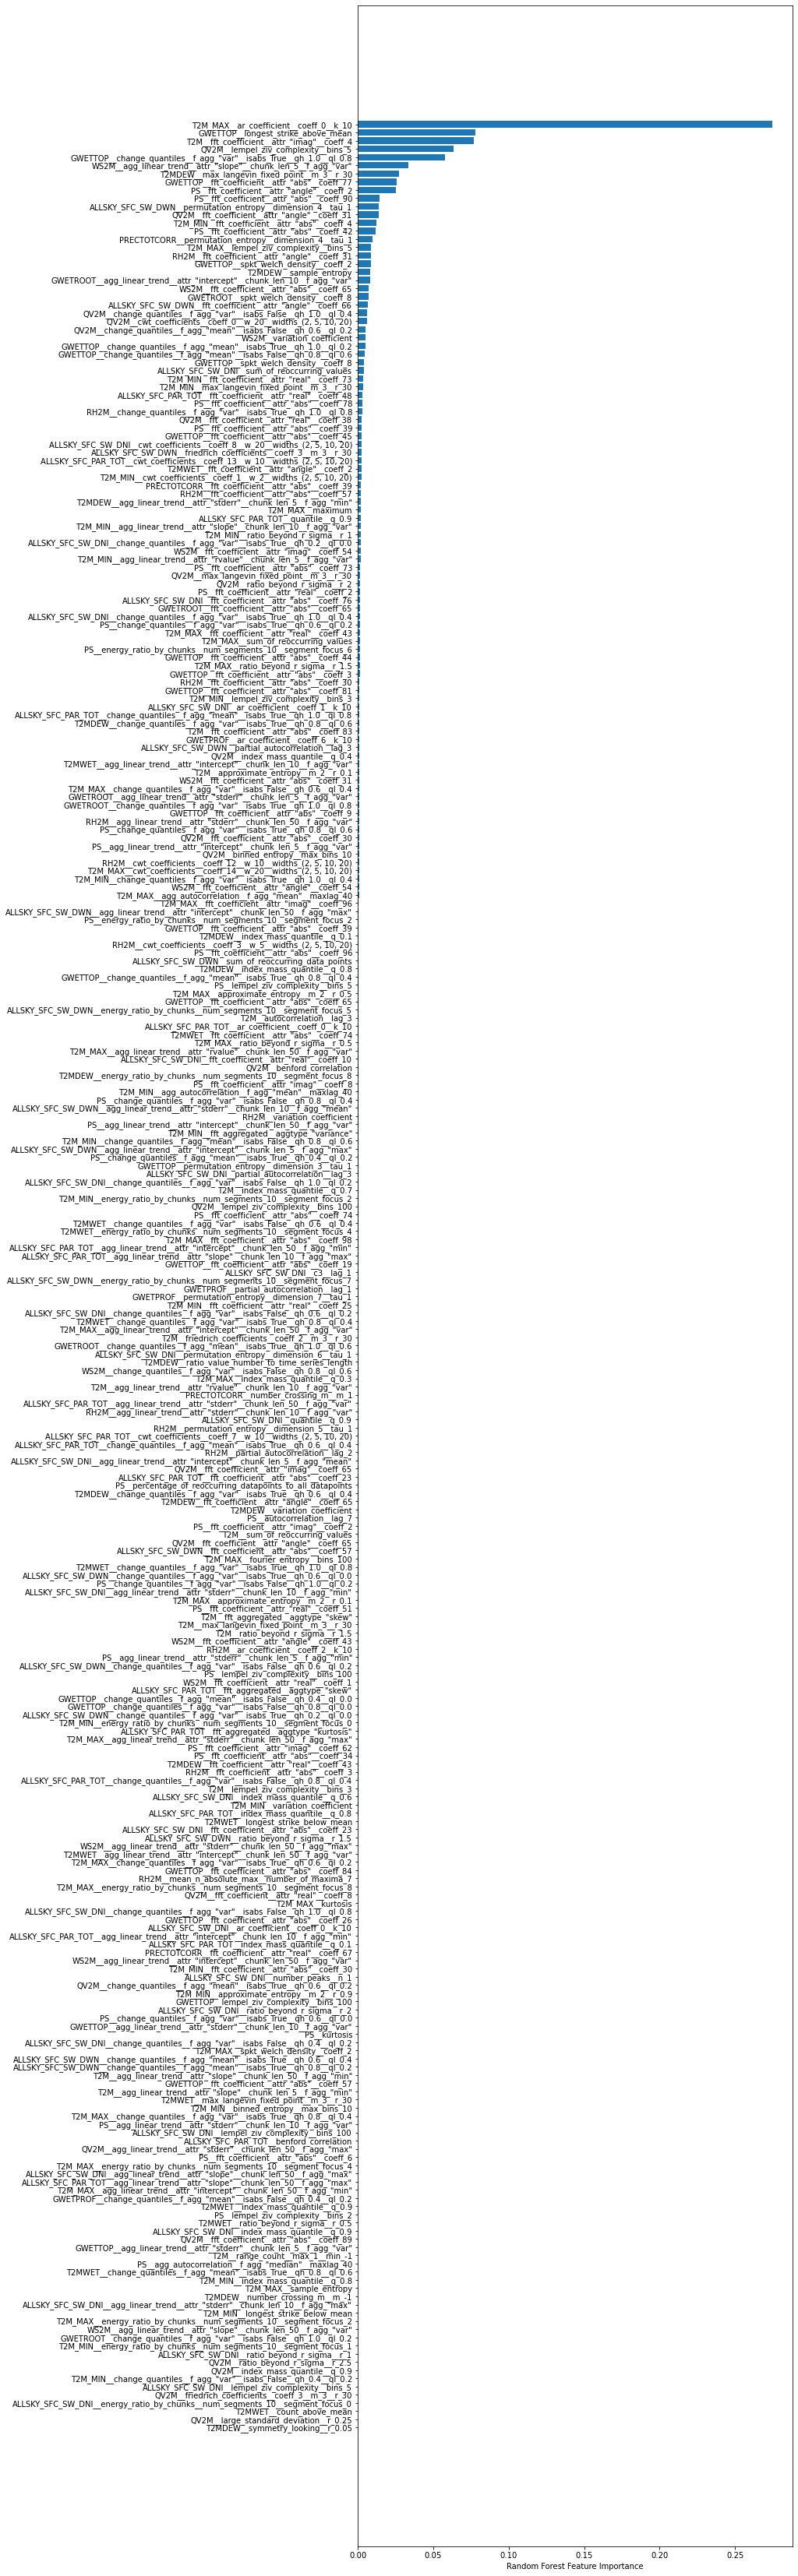

In [24]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize=(10, 60))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [25]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

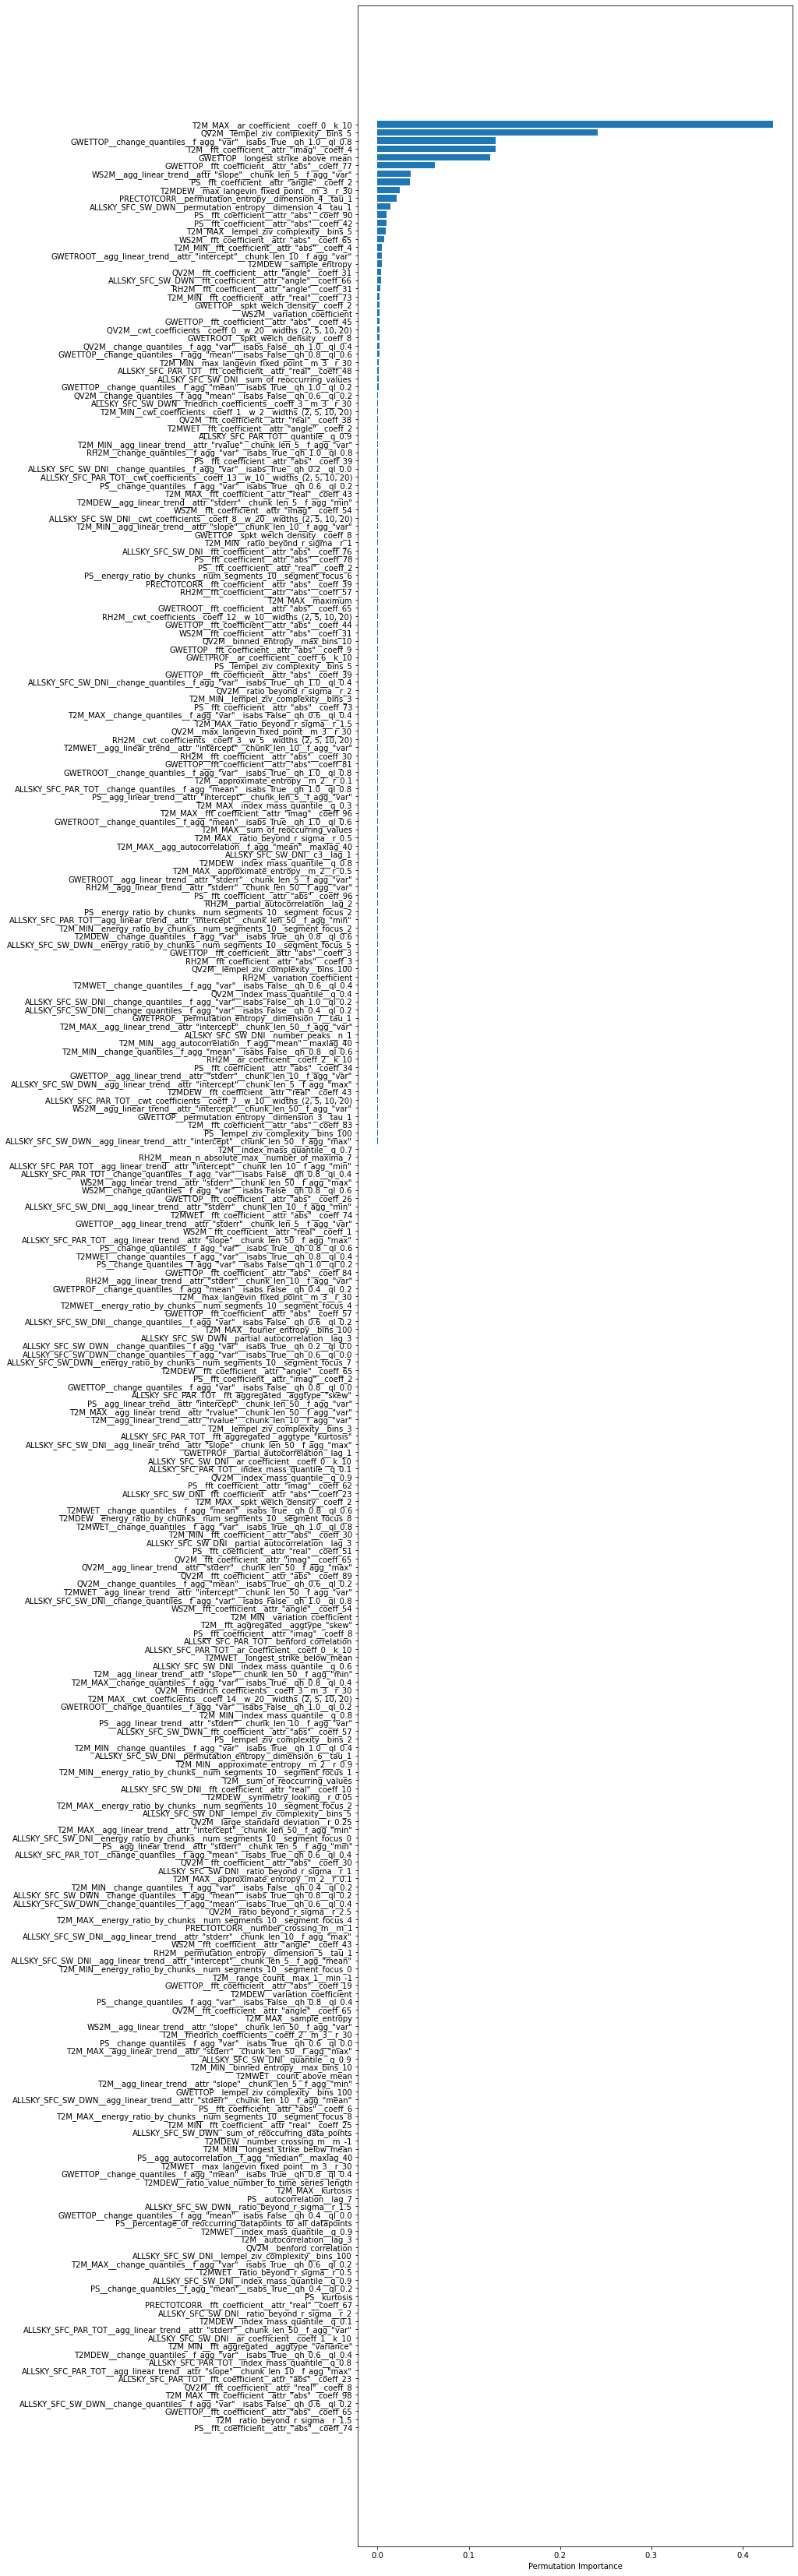

In [26]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(10, 60))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")